In [25]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 19s 0us/step


In [5]:
print("X_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", x_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)
X_test original shape (10000, 32, 32, 3)
y_test original shape (10000, 1)


Text(0.5, 1.0, '[9]')

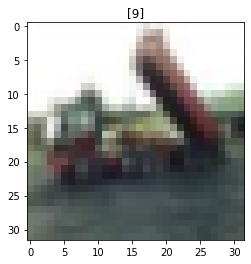

In [9]:
plt.imshow(x_train[2], cmap='gray')
plt.title(y_train[2])

In [10]:
# Preprocess the data (these are NumPy arrays)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# allocating 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [13]:
#instantiate the model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128,
             validation_data=(x_val, y_val),verbose=0)

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

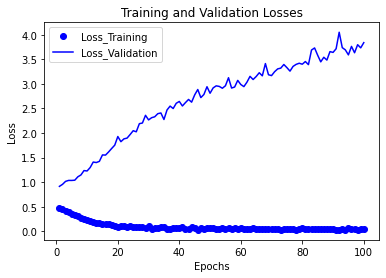

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(epochs, train_loss, 'bo', label='Loss_Training')
plt.plot(epochs, val_loss, 'b', label='Loss_Validation')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.savefig('results/6_2a_lossplot.png')

In [20]:
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(history.history['accuracy']) + 1)



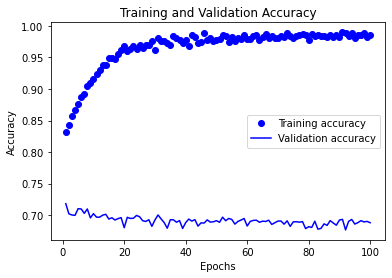

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(epochs, train_loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
plt.savefig('results/6_2a_accplot.png')

In [22]:
model.save('results/6_2a_model.h5')

In [23]:
score = model.evaluate(x_test, y_test)

print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 3.9177 - accuracy: 0.6841
Test accuracy:  0.6840999722480774


In [26]:
predictions = np.argmax(model.predict(x_test), axis=1)

predictions = list(predictions)
actuals = list(y_test)

pred_res = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
pred_res.to_csv('results/6_2a_predictions.csv', index=False)
print (pred_res)

                                                 Actual  Predictions
0     [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            3
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...            8
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...            8
3     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            0
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...            6
...                                                 ...          ...
9995  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...            3
9996  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            5
9997  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...            5
9998  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            4
9999  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...            7

[10000 rows x 2 columns]


In [27]:
#Metrics output
with open('results/6_2a_metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(score[0]))
    f.write('\nTest Accuracy: {}'.format(score[1]))